In [1]:
from yahoo_fin.stock_info import get_data
from datetime import date
import plotly.express as px
import pandas as pd
import numpy as np
from pathlib import Path
import csv
import seaborn as sns
%matplotlib inline


today = date.today()
spy = get_data("spy", start_date="01/03/2015", end_date=today, index_as_date = True, interval="1d")
xle = get_data("xle", start_date="01/03/2015", end_date=today, index_as_date = True, interval="1d")
gold = get_data("GLD", start_date="01/03/2015", end_date=today, index_as_date = True, interval="1d")
tlt = get_data("tlt", start_date="01/03/2015", end_date=today, index_as_date = True, interval="1d")
usd = get_data("tlt", start_date="01/03/2015", end_date=today, index_as_date = True, interval="1d")

In [2]:
# @TODO: Set file paths for btc_data.csv and eth_data.csv
btc_filepath = Path('Resources/BTC-USD.csv')
btc_df = pd.read_csv(btc_filepath, index_col="Date", infer_datetime_format=True, parse_dates=True)

btc_df.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


In [163]:
btc_df.sort_index(inplace=True)
btc_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


In [164]:
eth_filepath = Path('Resources/ETH-USD.csv')
eth_df = pd.read_csv(eth_filepath, index_col="Date", infer_datetime_format=True, parse_dates=True)

eth_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-08-07,2.831620,3.536610,2.521120,2.772120,2.772120,164329.0
2015-08-08,2.793760,2.798810,0.714725,0.753325,0.753325,674188.0
2015-08-09,0.706136,0.879810,0.629191,0.701897,0.701897,532170.0
2015-08-10,0.713989,0.729854,0.636546,0.708448,0.708448,405283.0
2015-08-11,0.708087,1.131410,0.663235,1.067860,1.067860,1463100.0


In [165]:
#fig = px.line(spy['close'], labels={ 'close' : 'SPY CLOSE'})
#fig.show()

In [166]:
#gold.head()

In [167]:
#dxy = get_data("dxy", start_date="01/03/2015", end_date=today, index_as_date = True, interval="1d")
#dxy['close'].plot(figsize=(20,10))

In [168]:
column = ['BTC', 'ETH', 'SPY', 'XLE', 'GLD', 'TLT']

combined_df = pd.concat([btc_df['Close'], eth_df['Close'], spy['close'], xle['close'], gold['close'], tlt['close']], axis="columns", join="inner")
combined_df.columns = (['BTC', 'ETH', 'SPY', 'XLE', 'GLD', 'TLT'])
combined_df.head()

,BTC,ETH,SPY,XLE,GLD,TLT
2015-08-07,279.584991,2.772120,207.949997,67.029999,104.650002,124.339996
2015-08-10,264.470001,0.708448,210.570007,69.169998,105.720001,122.800003
2015-08-11,270.385986,1.067860,208.669998,69.300003,106.260002,124.750000
2015-08-12,266.376007,1.217440,208.919998,70.559998,107.750000,124.070000
2015-08-13,264.079987,1.827670,208.660004,69.489998,106.860001,123.669998


In [169]:
combined_df.isnull().sum()

BTC    5
ETH    5
SPY    0
XLE    0
GLD    0
TLT    0
dtype: int64

In [170]:
portfolio_returns  = combined_df.dropna()

In [171]:
portfolio_returns.isnull().sum()

BTC    0
ETH    0
SPY    0
XLE    0
GLD    0
TLT    0
dtype: int64

In [172]:
portfolio_returns = portfolio_returns.pct_change()

In [173]:
portfolio_returns  = portfolio_returns.dropna()

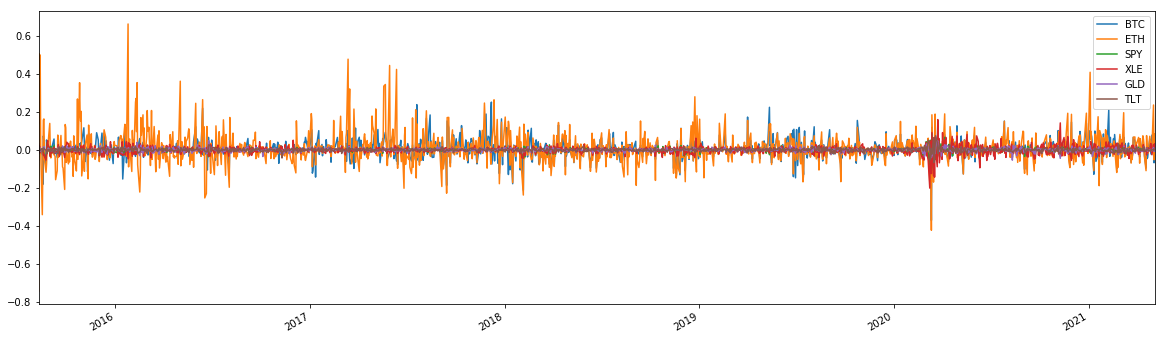

In [174]:
portfolio_returns.plot(figsize=(20,6))

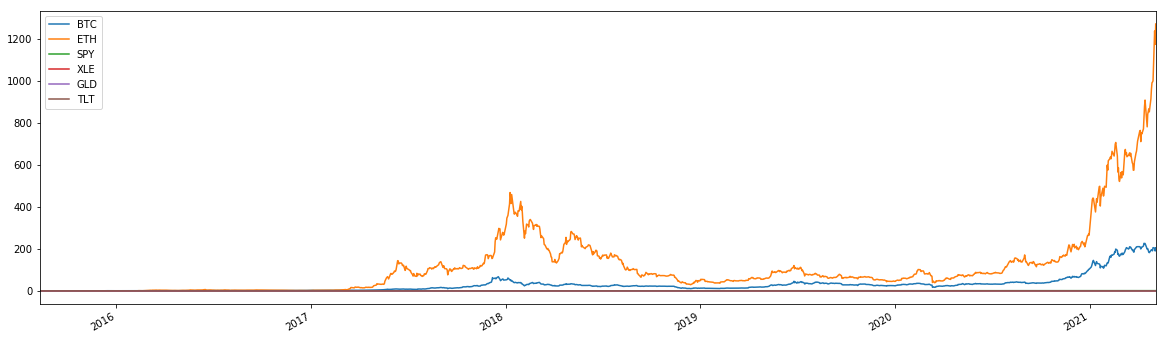

In [175]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + portfolio_returns).cumprod()
# Plot cumulative returns
cumulative_returns.plot(figsize=(20,6))

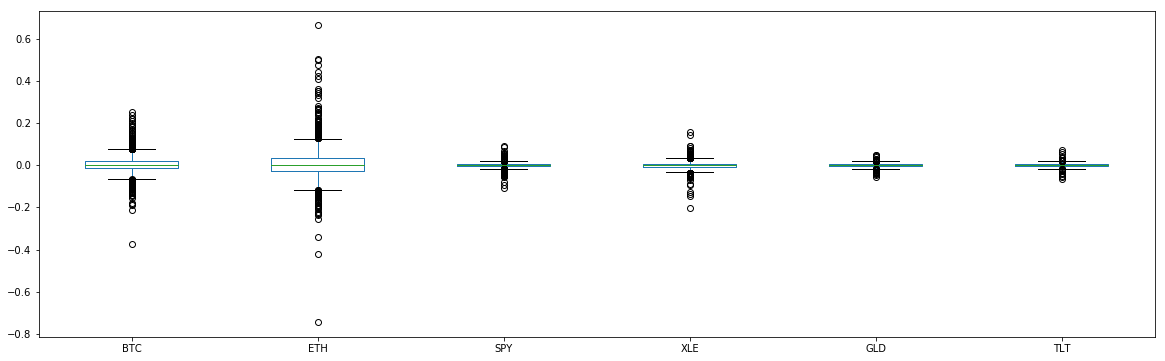

In [176]:
portfolio_returns.plot(kind='box',figsize=(20,6))

In [177]:
volatility = portfolio_returns.std()
volatility

BTC    0.046724
ETH    0.081419
SPY    0.011801
XLE    0.020487
GLD    0.008831
TLT    0.008719
dtype: float64

In [178]:
volatility = portfolio_returns.std() * np.sqrt(252)
volatility

BTC    0.741721
ETH    1.292482
SPY    0.187340
XLE    0.325214
GLD    0.140186
TLT    0.138411
dtype: float64

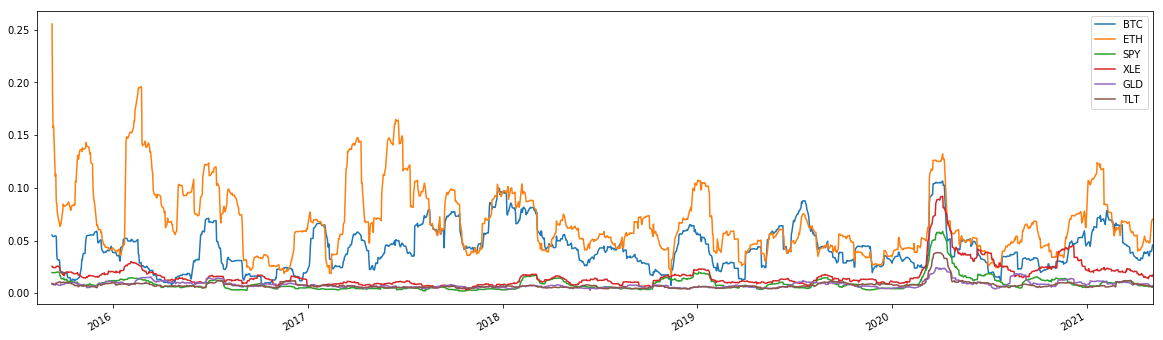

In [179]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
roll = portfolio_returns.rolling(window=21).std()
# Plot the rolling standard deviation
portfolio_returns.rolling(window=21).std().plot(figsize=(20,6))

In [180]:
# Calculate the correlation
price_correlation = portfolio_returns.corr()
# Display de correlation matrix
price_correlation

,BTC,ETH,SPY,XLE,GLD,TLT
BTC,1.000000,0.478717,0.142542,0.118354,0.104796,-0.029885
ETH,0.478717,1.000000,0.111941,0.082284,0.084387,-0.006073
SPY,0.142542,0.111941,1.000000,0.718332,-0.007816,-0.394084
XLE,0.118354,0.082284,0.718332,1.000000,-0.015398,-0.342205
GLD,0.104796,0.084387,-0.007816,-0.015398,1.000000,0.325467
TLT,-0.029885,-0.006073,-0.394084,-0.342205,0.325467,1.000000


In [181]:
# Use `ewm` to calculate the rolling window

portfolio_returns.ewm(halflife=21).mean().head()

,BTC,ETH,SPY,XLE,GLD,TLT
2015-08-10,-0.054062,-0.744438,0.012599,0.031926,0.010225,-0.012385
2015-08-11,-0.015216,-0.108229,0.001610,0.016655,0.007624,0.001980
2015-08-12,-0.015083,-0.022715,0.001468,0.017181,0.009827,-0.000579
2015-08-13,-0.013386,0.114829,0.000756,0.008690,0.005079,-0.001273
2015-08-14,-0.009236,0.090346,0.001372,0.006375,0.003975,-0.000501


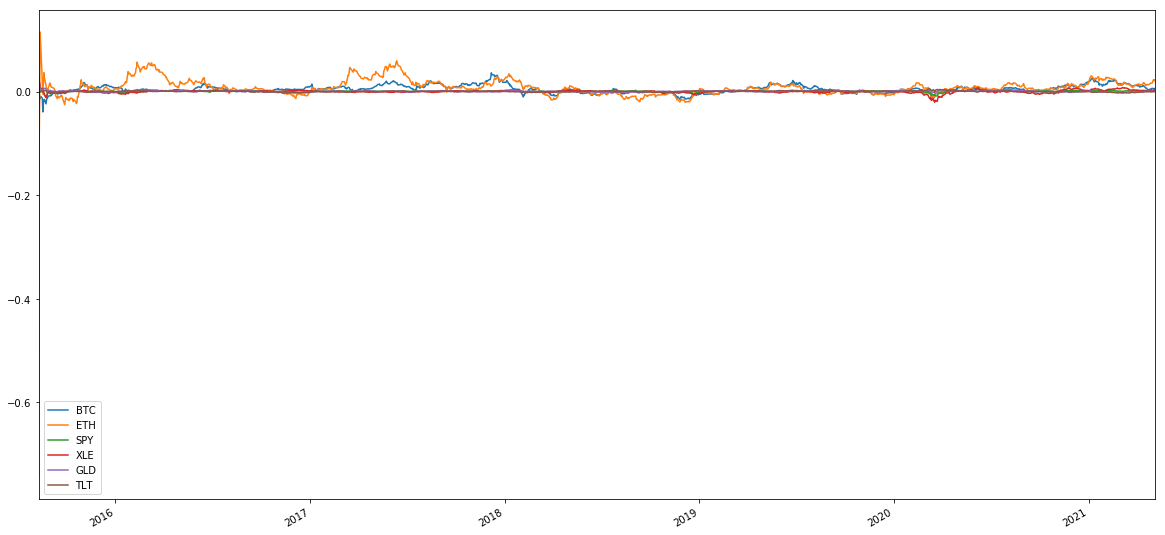

In [182]:
portfolio_returns.ewm(halflife=21).mean().plot(figsize=(20, 10))

In [183]:
# Annualized Sharpe Ratios
sharpe_ratios = (portfolio_returns.mean() * 252) / (portfolio_returns.std() * np.sqrt(252))
sharpe_ratios


BTC    1.630564
ETH    1.627823
SPY    0.741086
XLE    0.032084
GLD    0.655217
TLT    0.216178
dtype: float64

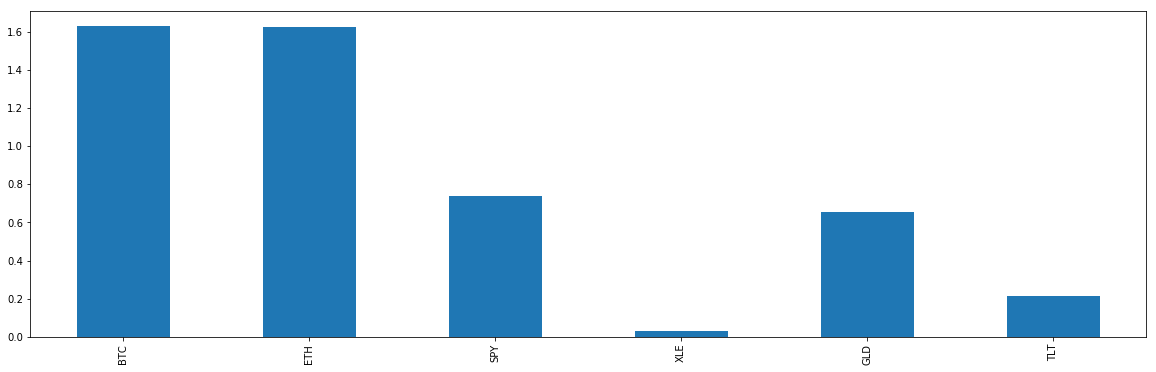

In [184]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar',figsize=(20,6))

In [185]:
# Calculate and plot the correlation
price_correlation_new = portfolio_returns.corr()
# Display de correlation matrix
price_correlation_new

,BTC,ETH,SPY,XLE,GLD,TLT
BTC,1.000000,0.478717,0.142542,0.118354,0.104796,-0.029885
ETH,0.478717,1.000000,0.111941,0.082284,0.084387,-0.006073
SPY,0.142542,0.111941,1.000000,0.718332,-0.007816,-0.394084
XLE,0.118354,0.082284,0.718332,1.000000,-0.015398,-0.342205
GLD,0.104796,0.084387,-0.007816,-0.015398,1.000000,0.325467
TLT,-0.029885,-0.006073,-0.394084,-0.342205,0.325467,1.000000


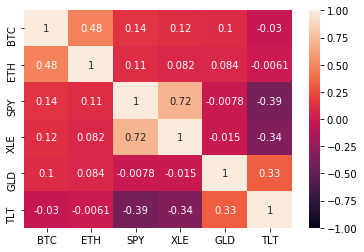

In [186]:
sns.heatmap(price_correlation_new, vmin=-1, vmax=1,annot=True)

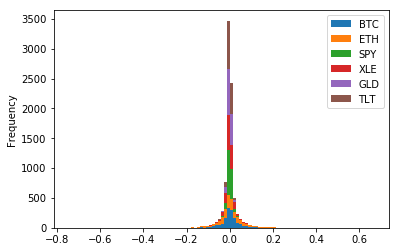

In [187]:
# Distribution Histogram

portfolio_returns.plot.hist(stacked=True, bins=100)



In [188]:
# Set weights
weights = [0,0,1/4,1/4,1/4,1/4]

# Calculate portfolio return

portfolio_returns_weight= portfolio_returns.dot(weights)
# portfolio_returns_new.set_index('Date')

portfolio_returns_weight.dropna()

# Display sample data
portfolio_returns_weight.head()

2015-08-10    0.010591
2015-08-11    0.003461
2015-08-12    0.006988
2015-08-13   -0.006973
2015-08-14    0.000934
dtype: float64